In [39]:
import librosa, librosa.feature, librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

from glob import glob
from tensorflow.keras.utils import to_categorical

In [32]:
def display_mfcc(dataset):
    y, _ = librosa.load(dataset)
    fitur_ektraksi = librosa.feature.mfcc(y=y)

    plt.figure(figsize=(10, 5))
    librosa.display.specshow(fitur_ektraksi, x_axis="time", y_axis="hz")
    plt.colorbar()
    plt.title("Logat Bahasa")
    plt.show()

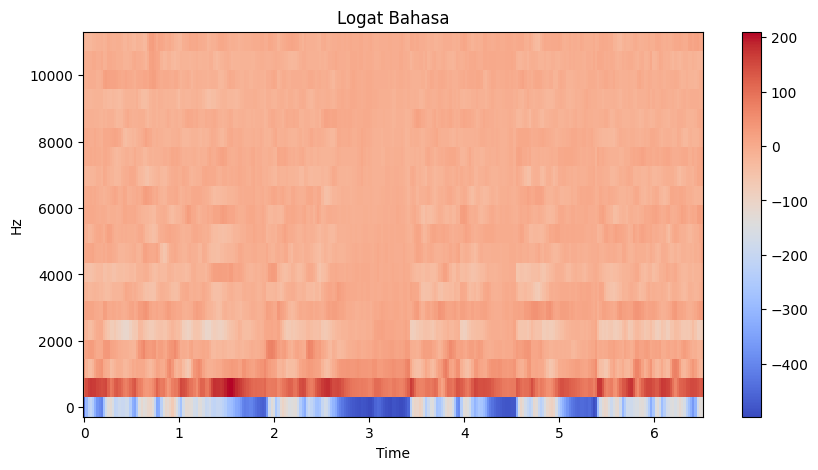

In [33]:
ex = display_mfcc("dataset-mp3/timur (16).mp3")
ex

In [34]:
# menampilkan audio
ipd.Audio("dataset-mp3/timur (16).mp3")

In [35]:
# ekstraksi fitur
def ekstraksi_fitur(dataFitur):
    y, _ = librosa.load(dataFitur)

    # gunakan mfcc
    get_mfcc = librosa.feature.mfcc(y=y)

    # normalisasi nilai dengan membagi dengan nilai max
    get_mfcc /= np.amax(np.absolute(get_mfcc))
    return np.ndarray.flatten(get_mfcc)[3800]

In [40]:
def generate_fiture():
    all_features = []
    all_labels = []

    jenis = ["sunda", "timur"]
    for jns in jenis:
        sound_files = glob(f"dataset-mp3/{jns}/*.mp3")
        for i in sound_files:
            ekstrak = ekstraksi_fitur(i)
            # print(ekstrak.size)
            # print(ekstrak.shape)
            all_features.append(ekstrak)
            all_labels.append(jns)

    # convert label ke bentuk binary
    label_uniq, label_row = np.unique(all_labels, return_inverse=True)
    label_row = label_row.astype(np.int32)
    one_hot_labels = to_categorical(label_row, len(label_uniq))
    return np.stack(all_features), one_hot_labels

In [41]:
features, labels = generate_fiture()